In [15]:
import os
import shutil as sh
import glob
import json
import datetime

import numpy as np
import nibabel as ni

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import pandas as pd
import pickle
from tqdm import tqdm


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt

# from scipy.io import loadmat
import h5py
import cv2

In [16]:
dataset="C:\IIT campus\Second Year\DSGP\Segementation_1"

<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:1: SyntaxWarning: invalid escape sequence '\I'
C:\Users\chanu\AppData\Local\Temp\ipykernel_31344\1700294054.py:1: SyntaxWarning: invalid escape sequence '\I'
  dataset="C:\IIT campus\Second Year\DSGP\Segementation_1"


In [32]:
# image_files="C:\IIT campus\Second Year\DSGP\Segementation_1\images"
# mask_files="C:\IIT campus\Second Year\DSGP\Segementation_1\masks"

image_files=sorted(os.listdir('C:\IIT campus\Second Year\DSGP\Segementation_1\images'))
mask_files=sorted(os.listdir('C:\IIT campus\Second Year\DSGP\Segementation_1\masks'))

<>:4: SyntaxWarning: invalid escape sequence '\I'
<>:5: SyntaxWarning: invalid escape sequence '\I'
<>:4: SyntaxWarning: invalid escape sequence '\I'
<>:5: SyntaxWarning: invalid escape sequence '\I'
C:\Users\chanu\AppData\Local\Temp\ipykernel_31344\2729663542.py:4: SyntaxWarning: invalid escape sequence '\I'
  image_files=sorted(os.listdir('C:\IIT campus\Second Year\DSGP\Segementation_1\images'))
C:\Users\chanu\AppData\Local\Temp\ipykernel_31344\2729663542.py:5: SyntaxWarning: invalid escape sequence '\I'
  mask_files=sorted(os.listdir('C:\IIT campus\Second Year\DSGP\Segementation_1\masks'))


In [33]:
print(image_files[:10])
print(mask_files[:10])

['1.png', '10.png', '100.png', '1000.png', '1001.png', '1002.png', '1003.png', '1004.png', '1005.png', '1006.png']
['1.png', '10.png', '100.png', '1000.png', '1001.png', '1002.png', '1003.png', '1004.png', '1005.png', '1006.png']


In [34]:
def display_image_mask(image_path,mask_path):
    count=0
    for image_file,mask_file in zip(image_files,mask_files):
        if count>=6:
            break
        image_path_full=os.path.join(image_path,image_file)
        mask_path_full=os.path.join(mask_path,mask_file)

        image=cv2.imread(image_path_full)
        mask=cv2.imread(mask_path_full,cv2.IMREAD_GRAYSCALE)

        if image is None:
                raise ValueError(f"Image at path {image_path_full} could not be loaded")
        if mask is None:
                raise ValueError(f"Mask at path {mask_path_full} could not be loaded")

        mask_3ch=cv2.merge([mask,mask,mask])
        image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(10,10))

        plt.subplot(1, 3, 1)
        plt.imshow(image)
        plt.title('Image')

        plt.subplot(1, 3, 2)
        plt.imshow(mask)
        plt.title('Mask')

        plt.subplot(1,3,3)
        overlay = cv2.addWeighted(image_rgb, 0.7, mask_3ch, 0.3, 0)
        plt.imshow(overlay)
        plt.title("Image with overlay")

        plt.show()
        count+=1

In [35]:
image_path="C:\IIT campus\Second Year\DSGP\Segementation_1\images"
mask_path="C:\IIT campus\Second Year\DSGP\Segementation_1\masks"

<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:2: SyntaxWarning: invalid escape sequence '\I'
<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:2: SyntaxWarning: invalid escape sequence '\I'
C:\Users\chanu\AppData\Local\Temp\ipykernel_31344\1820756127.py:1: SyntaxWarning: invalid escape sequence '\I'
  image_path="C:\IIT campus\Second Year\DSGP\Segementation_1\images"
C:\Users\chanu\AppData\Local\Temp\ipykernel_31344\1820756127.py:2: SyntaxWarning: invalid escape sequence '\I'
  mask_path="C:\IIT campus\Second Year\DSGP\Segementation_1\masks"


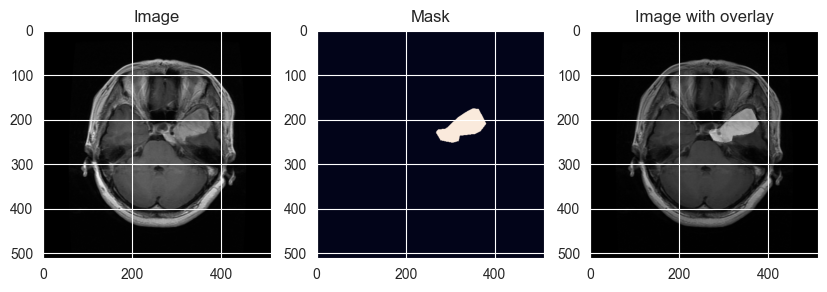

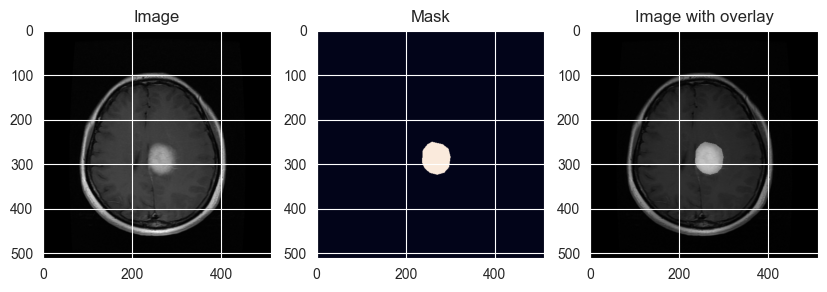

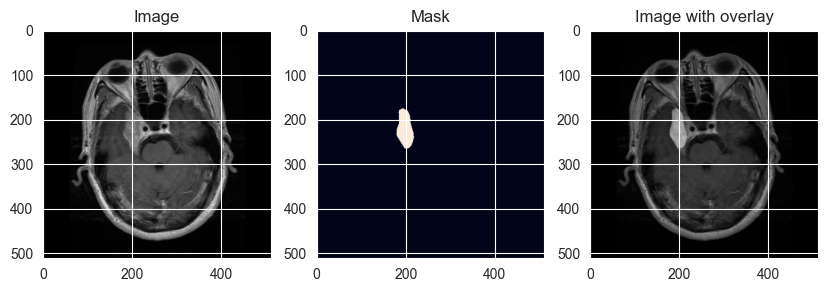

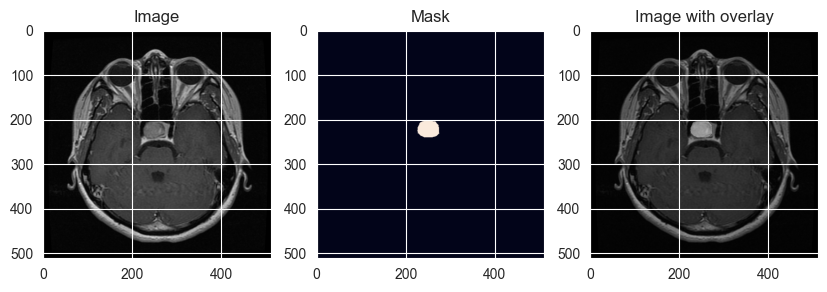

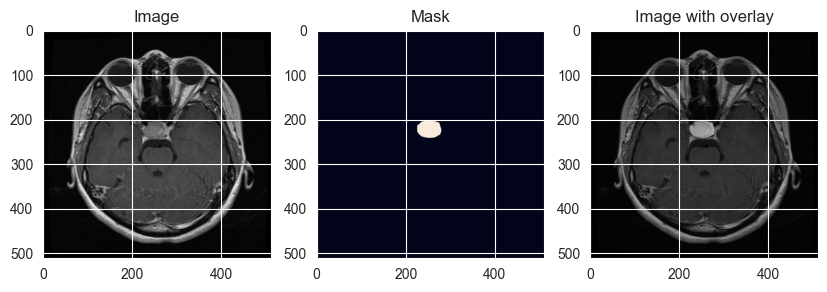

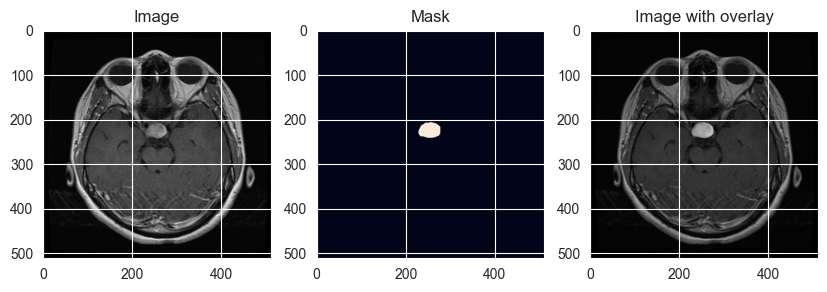

In [36]:
display_image_mask(image_path,mask_path)
